In [1]:
import pandas as pd 
card=pd.read_csv('c:/data/personal/wagecancel_add.csv')

In [2]:
# 각 컬럼 데이터유형 확인
card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22681418 entries, 0 to 22681417
Data columns (total 13 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   DATE         int64 
 1   CARD_AREA    object
 2   CARD_AREA_D  object
 3   CLASS        object
 4   HOME         object
 5   AGE          object
 6   SEX          int64 
 7   HOUSE        int64 
 8   CLIENT       int64 
 9   AMT          int64 
 10  CNT          int64 
 11  Wage         int64 
 12  CANCEL       int64 
dtypes: int64(8), object(5)
memory usage: 2.2+ GB


In [3]:
# 날짜, 성별, 가구유형은 명목변수 이므로 숫자형에서 문자형으로 변환
card['DATE']=card['DATE'].astype('str')
card['SEX'] = card['SEX'].astype('object')
card['HOUSE'] = card['HOUSE'].astype('object')

In [4]:
card.head()

,DATE,CARD_AREA,CARD_AREA_D,CLASS,HOME,AGE,SEX,HOUSE,CLIENT,AMT,CNT,Wage,CANCEL
0,201901,강원,강릉시,건강보조식품 소매업,강원 강릉시,20s,1,1,4,311200,4,1879834,0
1,201901,강원,강릉시,건강보조식품 소매업,강원 강릉시,30s,1,2,7,1374500,8,1879834,0
2,201901,강원,강릉시,건강보조식품 소매업,강원 강릉시,30s,2,2,6,818700,6,1879834,0
3,201901,강원,강릉시,건강보조식품 소매업,강원 강릉시,40s,1,3,4,1717000,5,1879834,0
4,201901,강원,강릉시,건강보조식품 소매업,강원 강릉시,40s,1,4,3,1047300,3,1879834,0


In [5]:
CLIENT=card.groupby(['DATE'],as_index=False).CLIENT.sum()
AMT=card.groupby(['DATE'],as_index=False).AMT.mean() 
CNT=card.groupby(['DATE'],as_index=False).CNT.sum()
CANCEL=card.groupby(['DATE'],as_index=False).CANCEL.sum()


In [6]:
merge1=pd.merge(CLIENT,AMT)
merge2=pd.merge(merge1,CNT)
date_group=pd.merge(merge2,CANCEL)
date_group

,DATE,CLIENT,AMT,CNT,CANCEL
0,201901,86397194,2.536494e+06,172716085,7885
1,201902,81353706,2.294254e+06,153678696,9390
2,201903,90549145,2.475378e+06,183267853,7928
3,201904,90351737,2.435627e+06,184572731,8827
4,201905,97406727,2.470197e+06,199742378,9455
5,201906,94474523,2.423253e+06,193028043,8978
6,201907,95450689,2.446676e+06,197806070,13514
7,201908,98190319,2.286000e+06,199890539,13534
8,201909,92762974,2.390243e+06,188058173,16227
9,201910,94144594,2.401770e+06,196272815,10124


In [7]:
# 수치형변수만 표준화할것이므로 범주형 DATE는 분리시켜줌 
X=date_group[['CLIENT','AMT','CNT','CANCEL']]
y=date_group[['DATE']]

In [8]:
# 표준화작업 
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler
s_scale=StandardScaler()
scaled=s_scale.fit_transform(X)

In [9]:
# 표준화로 1차원자료들을 다시 2차원 데이터프레임으로 변환 및 컬럼명 다시적용 
scaled=pd.DataFrame(scaled)
scaled.columns=['CLIENT','AMT','CNT','CANCEL']
# DATE와 데이터프레임 병합 
scaled_datagroup=pd.concat([y,scaled],axis=1)

In [10]:
scaled_datagroup

,DATE,CLIENT,AMT,CNT,CANCEL
0,201901,-0.255165,0.578587,-0.477698,-0.595628
1,201902,-0.907283,-1.626971,-1.686879,-0.338999
2,201903,0.281678,0.022139,0.192509,-0.588295
3,201904,0.256153,-0.339787,0.275390,-0.435000
4,201905,1.168356,-0.025035,1.238907,-0.327915
5,201906,0.789225,-0.452457,0.812439,-0.409252
6,201907,0.915442,-0.239191,1.115921,0.364214
7,201908,1.269674,-1.702120,1.248318,0.367625
8,201909,0.567924,-0.753001,0.496772,0.826828
9,201910,0.746566,-0.648050,1.018534,-0.213839


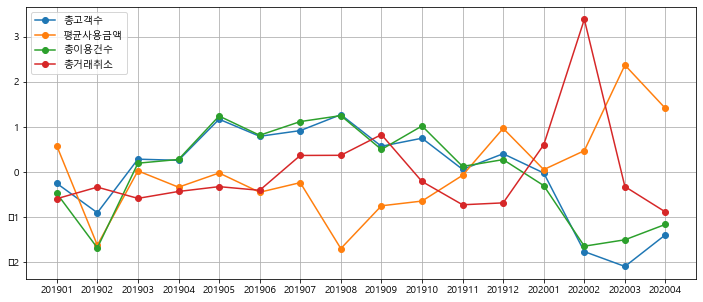

In [11]:
%matplotlib inline
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(12,5))
plt.rcParams['axes.grid'] = True
ax=fig.add_subplot()
ax.plot(scaled_datagroup['DATE'],scaled_datagroup['CLIENT'], marker='o',label='총고객수')
ax.plot(scaled_datagroup['DATE'],scaled_datagroup['AMT'], marker='o',label='평균사용금액')
ax.plot(scaled_datagroup['DATE'],scaled_datagroup['CNT'], marker='o',label='총이용건수')
ax.plot(scaled_datagroup['DATE'],scaled_datagroup['CANCEL'], marker='o',label='총거래취소')
ax.legend()